# Data

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
customers = pd.read_csv(r"C:\Users\rabia\Project_workintech\Workintech_data_analysis_graduation_project\data\customers.csv")
orders = pd.read_csv(r"C:\Users\rabia\Project_workintech\Workintech_data_analysis_graduation_project\data\orders_updated.csv")
products = pd.read_csv(r"C:\Users\rabia\Project_workintech\Workintech_data_analysis_graduation_project\data\products.csv")
sales = pd.read_csv(r"C:\Users\rabia\Project_workintech\Workintech_data_analysis_graduation_project\data\sales.csv")

In [71]:
#sales = sales.rename(columns={"quantity":"quantity_sold"})
#sales.to_csv(r"C:\Users\rabia\Project_workintech\Workintech_data_analysis_graduation_project\data\sales_updated.csv", index=False)

In [72]:
#products = products.drop(columns=["quantity"])
#products.to_csv(r"C:\Users\rabia\Project_workintech\Workintech_data_analysis_graduation_project\data\products_updated.csv", index=False)

In [73]:
df = sales.merge(products, left_on='product_id', right_on='product_ID', how='left')
df = df.rename(columns={'quantity_x':'quantity_sold'})
df = df.rename(columns={'quantity_y':'quantity_product'})
df

,sales_id,order_id,product_id,price_per_unit,quantity_sold,total_price,product_ID,product_type,product_name,size,colour,price,quantity_product,description
0,0,1,218,106,2,212,218,Shirt,Chambray,L,orange,105,44,"A orange coloured, L sized, Chambray Shirt"
1,1,1,481,118,1,118,481,Jacket,Puffer,S,indigo,110,62,"A indigo coloured, S sized, Puffer Jacket"
2,2,1,2,96,3,288,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt"
3,3,1,1002,106,2,212,1002,Trousers,Wool,M,blue,111,52,"A blue coloured, M sized, Wool Trousers"
4,4,1,691,113,3,339,691,Jacket,Parka,S,indigo,119,53,"A indigo coloured, S sized, Parka Jacket"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,998,321,109,2,218,321,Shirt,Mandarin Collar,S,orange,108,52,"A orange coloured, S sized, Mandarin Collar Shirt"
4996,4996,998,251,95,3,285,251,Shirt,Polo,S,orange,117,78,"A orange coloured, S sized, Polo Shirt"
4997,4997,999,872,113,1,113,872,Trousers,Chinos,M,violet,100,54,"A violet coloured, M sized, Chinos Trousers"
4998,4998,999,998,106,2,212,998,Trousers,Wool,L,green,111,42,"A green coloured, L sized, Wool Trousers"


# Product-based sales performance analysis

In [74]:
top_15 = df.groupby('product_name')['quantity_sold'].sum().nlargest(15).sort_values(ascending=False)
print(top_15)

product_name
Denim              527
Joggers            334
Pleated            308
Casual Slim Fit    306
Shearling          302
Relaxed Leg        301
Trench Coat        299
Puffer             298
Bomber             297
Chambray           290
Oxford Cloth       289
Drawstring         288
Slim-Fit           288
Windbreaker        287
Cropped            284
Name: quantity_sold, dtype: int64


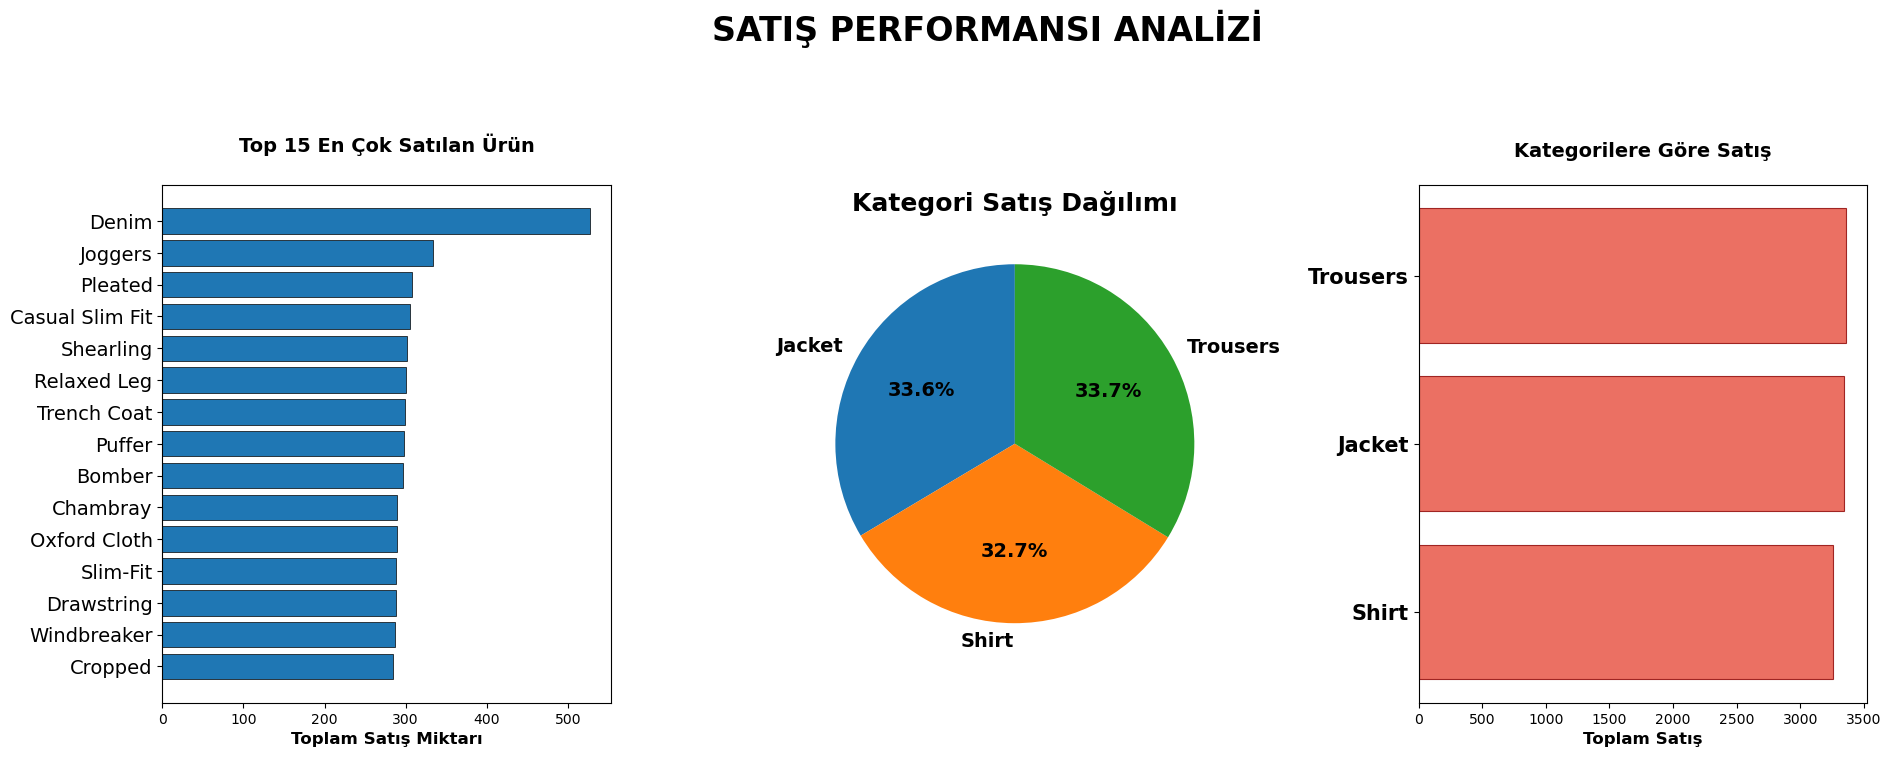

C:\Users\rabia\AppData\Local\Temp\ipykernel_9988\1250348755.py:39: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



In [75]:
fig = plt.figure(figsize=(22, 7))
gs = fig.add_gridspec(1, 3, hspace=0.4, wspace=0.4)

def pct_format(pct):
    return f'{pct:.1f}%'

type_sales = df.groupby('product_type')['quantity_sold'].sum()


# 1. En çok satılan ürünler
ax1 = fig.add_subplot(gs[0, 0])
top_15 = df.groupby('product_name')['quantity_sold'].sum().nlargest(15).sort_values()

bars = ax1.barh(range(len(top_15)), top_15.values, edgecolor='black', linewidth=0.5)
ax1.set_yticks(range(len(top_15)))
ax1.set_yticklabels(top_15.index, fontsize=14)
ax1.set_xlabel('Toplam Satış Miktarı', fontsize=12, fontweight='bold')
ax1.set_title('Top 15 En Çok Satılan Ürün', fontsize=14, fontweight='bold', pad=24)

# 2. Kategori dağılımı
ax2 = fig.add_subplot(gs[0, 1])
patches, texts, autotexts = ax2.pie(type_sales,labels=type_sales.index,autopct=lambda pct: pct_format(pct),startangle=90,
                                    textprops={'fontsize': 14, 'fontweight':'bold'})
ax2.set_title('Kategori Satış Dağılımı', fontsize=18, fontweight='bold')

# 3. Kategori detaylı
ax3 = fig.add_subplot(gs[0, 2])
type_sales_sorted = type_sales.sort_values()

bars = ax3.barh(range(len(type_sales_sorted)), type_sales_sorted.values,color='#e74c3c', alpha=0.8, edgecolor='darkred', linewidth=0.8)
ax3.set_yticks(range(len(type_sales_sorted)))
ax3.set_yticklabels(type_sales_sorted.index, fontsize=15, fontweight='bold')
ax3.set_xlabel('Toplam Satış', fontsize=12, fontweight='bold')
ax3.set_title('Kategorilere Göre Satış', fontsize=14, fontweight='bold', pad=20)

plt.suptitle('SATIŞ PERFORMANSI ANALİZİ',fontsize=24, fontweight='bold', y=1.1)
plt.subplots_adjust(top=0.85, wspace=0.3)
plt.show()
fig.show()

# Colour & Size Preference Index

In [76]:
category_color = df.groupby(['product_type', 'colour'])['quantity_sold'].sum().unstack(fill_value=0)
top_colors = df.groupby('colour')['quantity_sold'].sum().nlargest(15)
top_colors.index

Index(['blue', 'violet', 'indigo', 'red', 'yellow', 'green', 'orange'], dtype='object', name='colour')

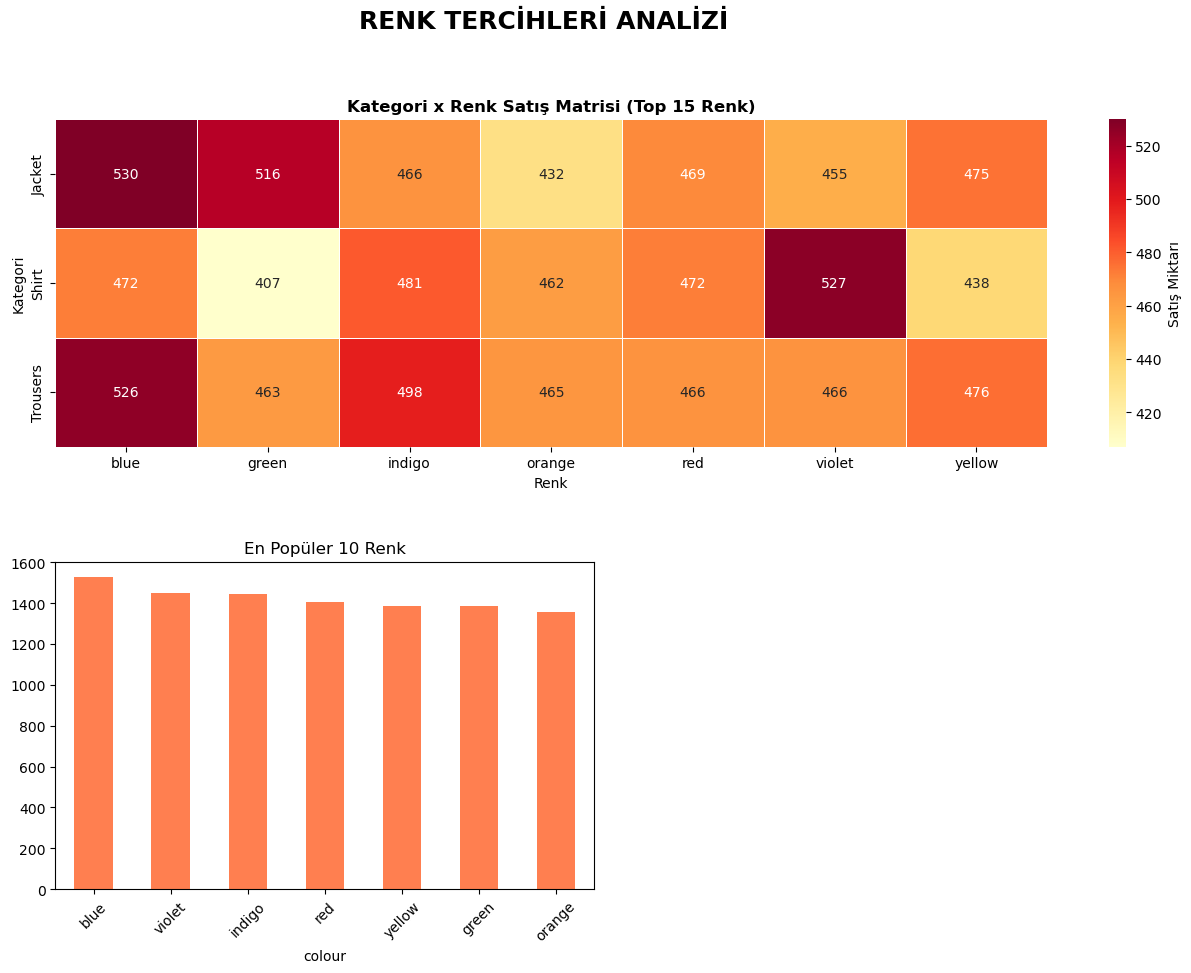

In [77]:
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3)

# 1. Kategori x Renk Heatmap
ax1 = fig.add_subplot(gs[0, :])
category_color_filtered = category_color[category_color.columns.intersection(top_colors.index)]
sns.heatmap(category_color_filtered, annot=True, fmt='g', cmap='YlOrRd',linewidths=0.5, ax=ax1, cbar_kws={'label': 'Satış Miktarı'})
ax1.set_title('Kategori x Renk Satış Matrisi (Top 15 Renk)',fontsize=12, fontweight='bold')
ax1.set_xlabel('Renk')
ax1.set_ylabel('Kategori')

# 2. Top 15 En Popüler Renk
ax2 = fig.add_subplot(gs[1, 0])
top_colors.plot(kind='bar', ax=ax2, color='coral')
ax2.set_title('En Popüler 10 Renk')
ax2.tick_params(axis='x', rotation=45)

plt.suptitle('RENK TERCİHLERİ ANALİZİ', fontsize=18, fontweight='bold', y=0.99, x=0.43)
plt.show()

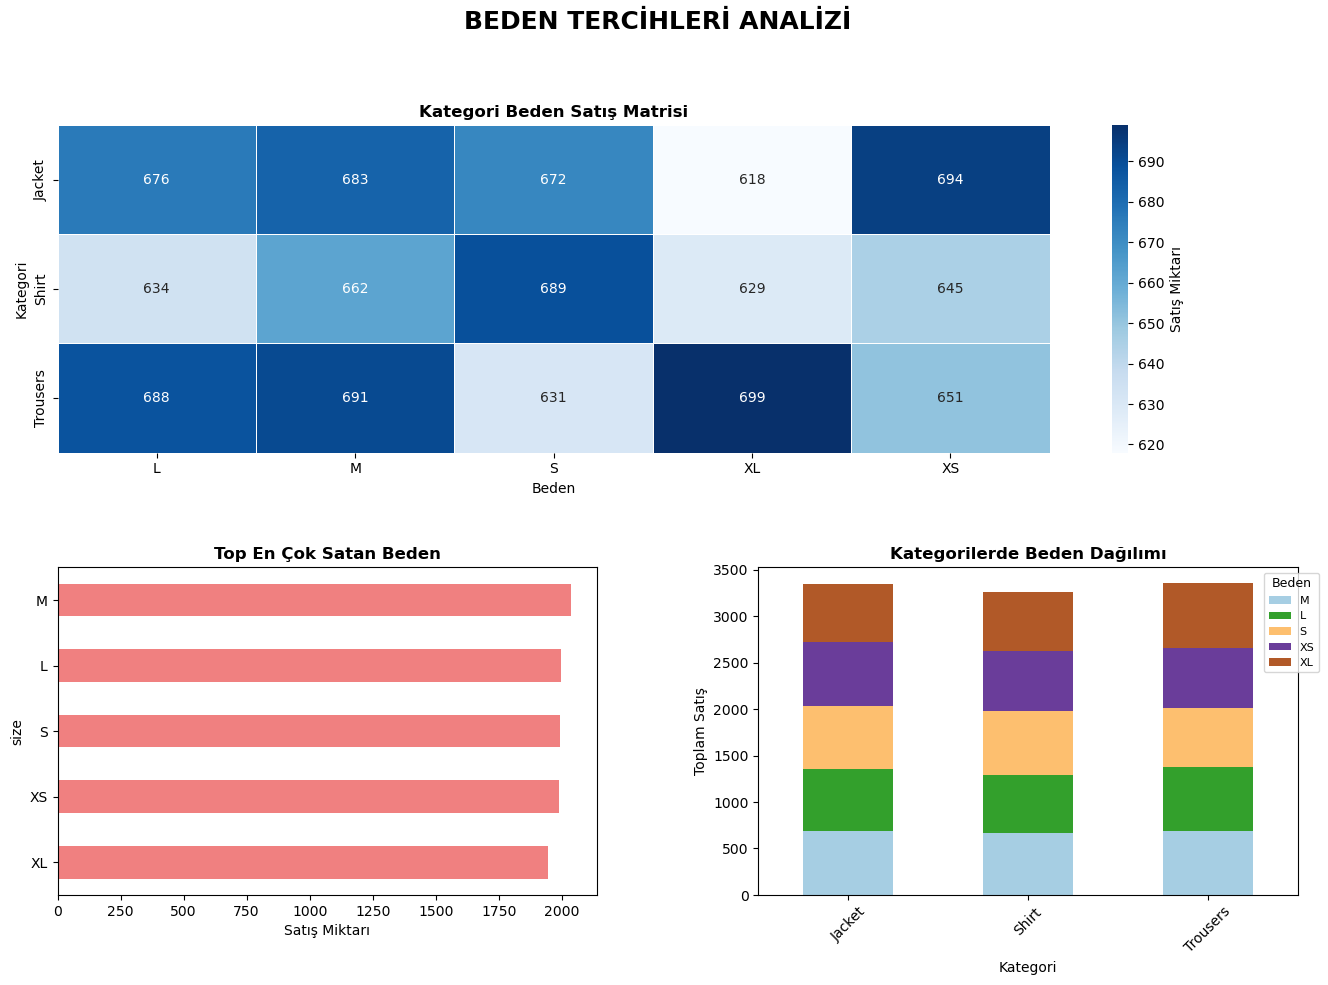

In [78]:
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3)

# 1. Kategori x Beden Heatmap
ax1 = fig.add_subplot(gs[0, :])

category_size = df.groupby(['product_type', 'size'])['quantity_sold'].sum().unstack(fill_value=0)

sns.heatmap(category_size, annot=True, fmt='g', cmap='Blues', 
            linewidths=0.5, ax=ax1, cbar_kws={'label': 'Satış Miktarı'})
ax1.set_title('Kategori Beden Satış Matrisi', 
              fontsize=12, fontweight='bold')
ax1.set_xlabel('Beden')
ax1.set_ylabel('Kategori')

# 2. Top 15 En Popüler Beden
ax2 = fig.add_subplot(gs[1, 0])

top_sizes = df.groupby('size')['quantity_sold'].sum().nlargest(15).sort_values()

top_sizes.plot(kind='barh', ax=ax2, color='lightcoral')
ax2.set_title('Top En Çok Satan Beden', fontsize=12, fontweight='bold')
ax2.set_xlabel('Satış Miktarı')

# 3. Kategorilerde Beden Dağılımı (Stacked Bar)
ax3 = fig.add_subplot(gs[1, 1])

top_sizes = df.groupby('size')['quantity_sold'].sum().nlargest(10).index
category_size_pivot = df.groupby(['product_type', 'size'])['quantity_sold'].sum().unstack(fill_value=0)

category_size_pivot[top_sizes].plot(kind='bar', stacked=True, ax=ax3, 
                                       colormap='Paired')
ax3.set_title('Kategorilerde Beden Dağılımı', fontsize=12, fontweight='bold')
ax3.set_xlabel('Kategori')
ax3.set_ylabel('Toplam Satış')
ax3.tick_params(axis='x', rotation=45)
ax3.legend(title='Beden', fontsize=8, title_fontsize=9, bbox_to_anchor=(1.05, 1))

plt.suptitle('BEDEN TERCİHLERİ ANALİZİ',fontsize=18, fontweight='bold', y=0.995)
plt.show()

# PRICE & STOCK ANALYSIS

In [79]:
#ortalama satış fiyatı
avg_price = df.groupby('product_type')['price_per_unit'].mean().sort_values(ascending=False)
avg_price

product_type
Jacket      106.628282
Shirt       102.352224
Trousers    101.508616
Name: price_per_unit, dtype: float64

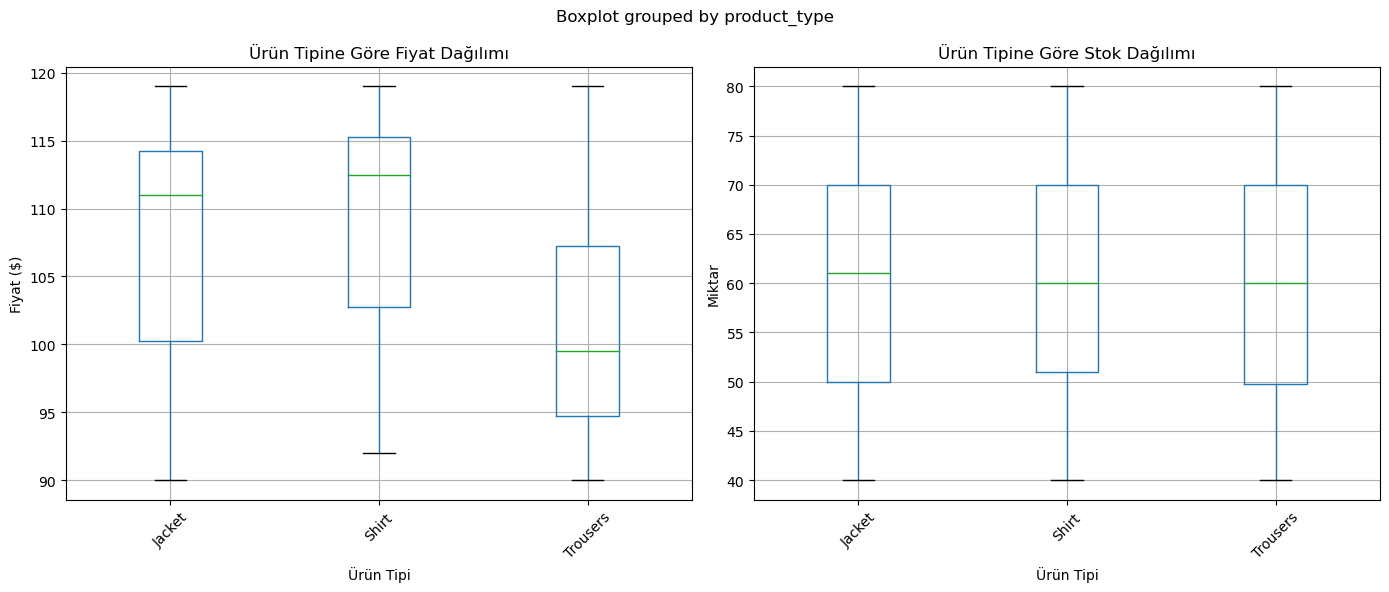

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Fiyat dağılımı
products.boxplot(column='price', by='product_type', ax=axes[0])
axes[0].set_title('Ürün Tipine Göre Fiyat Dağılımı')
axes[0].set_xlabel('Ürün Tipi')
axes[0].set_ylabel('Fiyat ($)')
plt.sca(axes[0])
plt.xticks(rotation=45)

# Miktar dağılımı
products.boxplot(column='quantity', by='product_type', ax=axes[1])
axes[1].set_title('Ürün Tipine Göre Stok Dağılımı')
axes[1].set_xlabel('Ürün Tipi')
axes[1].set_ylabel('Miktar')
plt.sca(axes[1])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

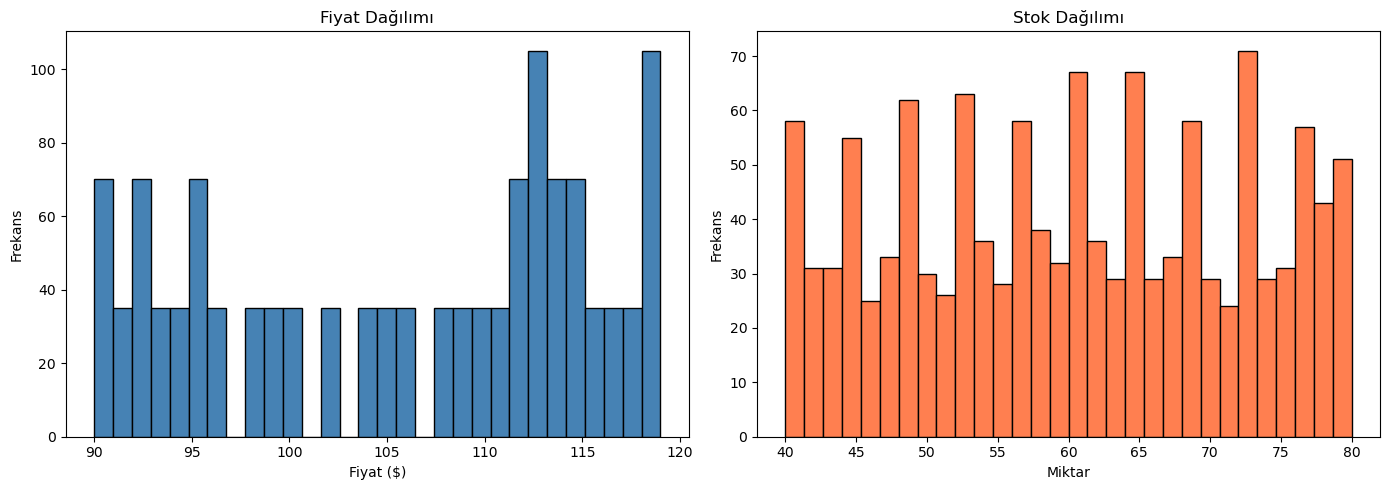

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(products['price'], bins=30, color='steelblue', edgecolor='black')
axes[0].set_title('Fiyat Dağılımı')
axes[0].set_xlabel('Fiyat ($)')
axes[0].set_ylabel('Frekans')

axes[1].hist(products['quantity'], bins=30, color='coral', edgecolor='black')
axes[1].set_title('Stok Dağılımı')
axes[1].set_xlabel('Miktar')
axes[1].set_ylabel('Frekans')

plt.tight_layout()
plt.show()

# Active Product Performance Analysis

In [82]:
#Kategori bazlı gelir
category_revenue = df.groupby('product_type')['total_price'].sum().sort_values(ascending=False)
category_revenue


product_type
Jacket      357026
Trousers    341174
Shirt       333600
Name: total_price, dtype: int64

In [83]:
category_revenue_df = category_revenue.to_frame().reset_index()
category_revenue_df['revenue_share_%'] = 100 * category_revenue_df['total_price'] / category_revenue_df['total_price'].sum()

category_revenue_df

,product_type,total_price,revenue_share_%
0,Jacket,357026,34.602248
1,Trousers,341174,33.065904
2,Shirt,333600,32.331847


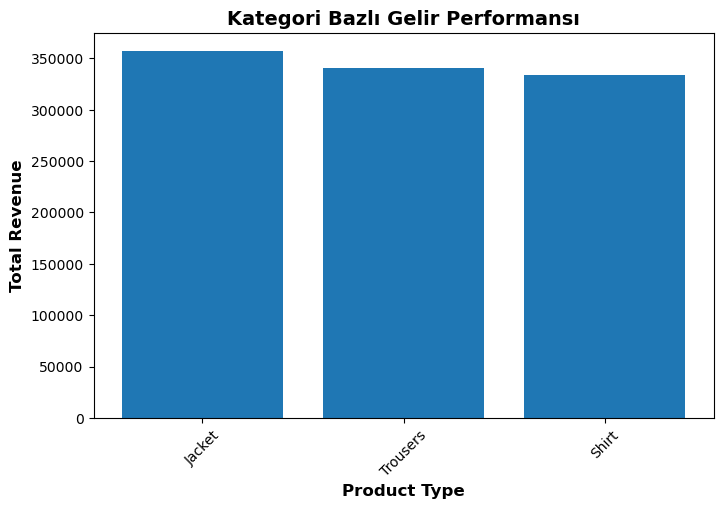

In [84]:
plt.figure(figsize=(8,5))
plt.bar(category_revenue.index, category_revenue.values)
plt.title("Kategori Bazlı Gelir Performansı", fontsize=14, fontweight='bold')
plt.xlabel("Product Type", fontsize=12, fontweight='bold')
plt.ylabel("Total Revenue", fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


In [85]:
product_unit_profitability = (
    df.groupby('product_name')
      .apply(lambda x: x['total_price'].sum() / x['quantity_sold'].sum())
      .reset_index(name='unit_profitability')
      .sort_values(by='unit_profitability', ascending=False)
)
product_unit_profitability.head(15)

,product_name,unit_profitability
32,Trench Coat,119.0
4,Casual Slim Fit,119.0
26,Puffer,118.0
14,Flannel,118.0
29,Shearling,117.0
9,Cropped,115.0
22,Parka,113.0
6,Chinos,113.0
31,Tracksuit Bottoms,112.0
2,Cardigan,112.0


In [86]:
category_profitability = (
    df.groupby('product_type')
      .apply(lambda x: x['total_price'].sum() / x['quantity_sold'].sum())
      .reset_index(name='unit_profitability')
      .sort_values(by='unit_profitability', ascending=False)
)
category_profitability

,product_type,unit_profitability
0,Jacket,106.798086
1,Shirt,102.362688
2,Trousers,101.539881


Profitability Index yüksek olan ürün → fiyatı daha premium konumlandırılabilir

Profitability Index düşük olan ürün → ya düşük fiyat / yüksek quantity satışı var ya da kampanyaların agresif etkisi var

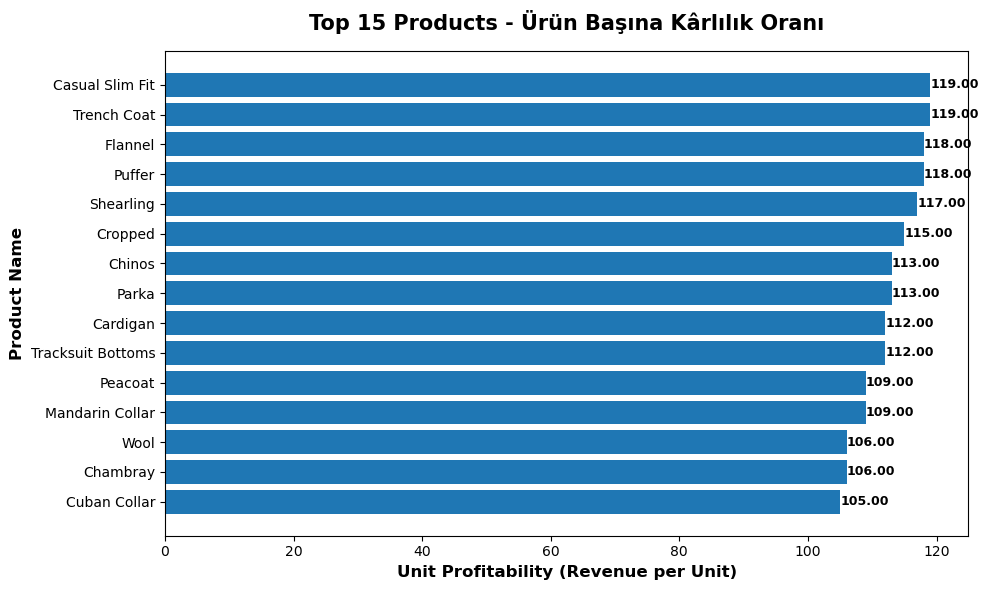

In [87]:
product_profitability = (
    df.groupby('product_name')
      .apply(lambda x: x['total_price'].sum() / x['quantity_sold'].sum())
      .reset_index(name='unit_profitability')
      .sort_values(by='unit_profitability', ascending=False)
)

# top 15
top15_profitability = product_profitability.head(15).sort_values(by='unit_profitability')

plt.figure(figsize=(10,6))
plt.barh(top15_profitability['product_name'], top15_profitability['unit_profitability'])
plt.xlabel("Unit Profitability (Revenue per Unit)", fontsize=12, fontweight='bold')
plt.ylabel("Product Name", fontsize=12, fontweight='bold')
plt.title("Top 15 Products - Ürün Başına Kârlılık Oranı", fontsize=15, fontweight='bold', pad=15)

for i, v in enumerate(top15_profitability['unit_profitability']):
    plt.text(v, i, f'{v:.2f}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()



Product Performance Index (PPI)

In [88]:
#Product Performance Index (PPI)

ppi = (df.groupby('product_name')
         .apply(lambda x: x['total_price'].sum() * x['quantity_sold'].sum())
         .reset_index(name='PPI')
         .sort_values(by='PPI', ascending=False))
ppi['PPI_scaled'] = ppi['PPI'] / 1_000_000

print(ppi.head(15))

       product_name       PPI  PPI_scaled
11            Denim  27614273   27.614273
4   Casual Slim Fit  11142684   11.142684
29        Shearling  10670868   10.670868
32      Trench Coat  10638719   10.638719
26           Puffer  10478872   10.478872
17          Joggers  10374708   10.374708
24          Pleated   9960720    9.960720
14          Flannel   9317398    9.317398
9           Cropped   9275440    9.275440
5          Chambray   8914600    8.914600
0            Bomber   8820900    8.820900
33      Windbreaker   8401638    8.401638
22            Parka   8176793    8.176793
28      Relaxed Leg   8154090    8.154090
30         Slim-Fit   8045568    8.045568


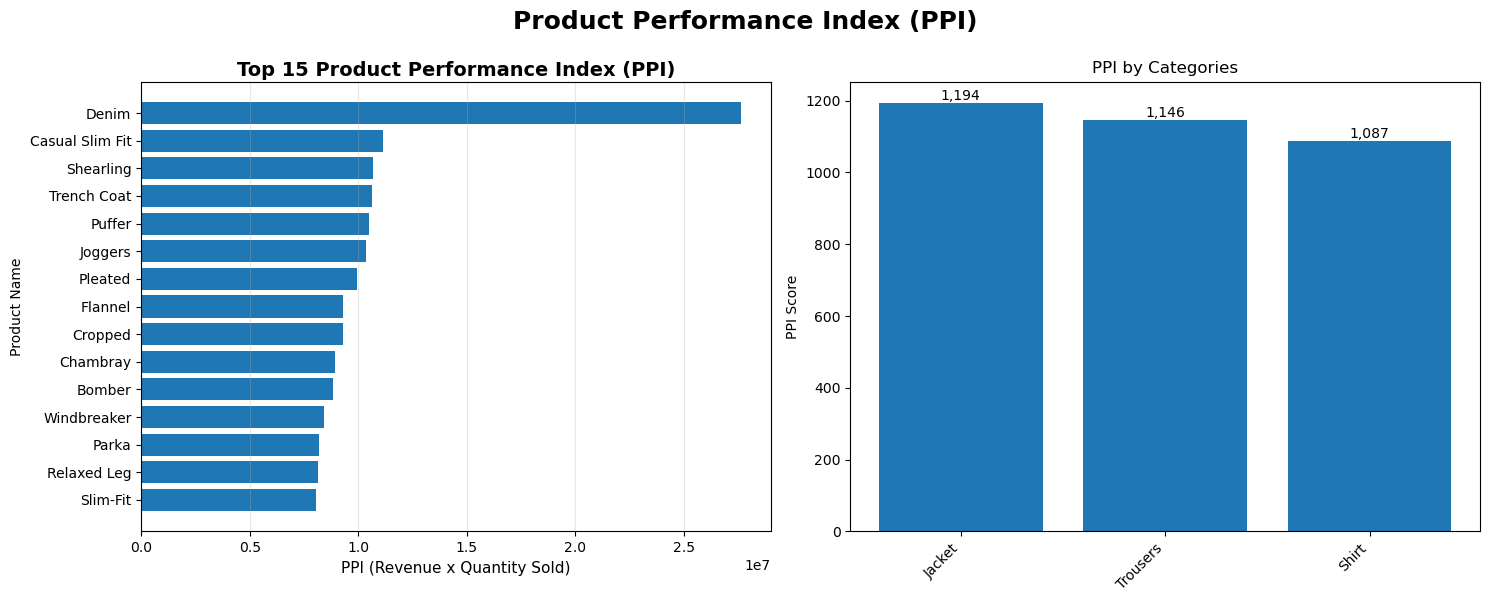

In [89]:
ppi_top15 = ppi.head(15).sort_values(by='PPI')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# Top 15 product PPI 
ax1.barh(ppi_top15['product_name'], ppi_top15['PPI'])
ax1.set_xlabel("PPI (Revenue x Quantity Sold)", fontsize=11)
ax1.set_ylabel("Product Name", fontsize=10)
ax1.set_title("Top 15 Product Performance Index (PPI)", fontsize=14, fontweight='bold', pad=4)
ax1.grid(axis='x', alpha=0.3)

# PPI by Category (düzeltilmiş)
ppi_by_category = (df.groupby('product_type')
                     .apply(lambda x: (x['total_price'].sum() * x['quantity_sold'].sum()))
                     .reset_index(name='PPI')
                     .sort_values(by='PPI', ascending=False))

ppi_by_category['PPI_scaled'] = ppi_by_category['PPI'] / 1_000_000


ax2.bar(ppi_by_category['product_type'], ppi_by_category['PPI_scaled'])
ax2.set_xticks(range(len(ppi_by_category)))
ax2.set_xticklabels(ppi_by_category['product_type'], rotation=45, ha='right')
ax2.set_title('PPI by Categories')
ax2.set_ylabel('PPI Score')

for i, v in enumerate(ppi_by_category['PPI_scaled']):
    ax2.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

plt.suptitle('Product Performance Index (PPI)',fontsize=18, fontweight='bold', y=0.995)    
plt.tight_layout()
plt.show()


In [90]:
ppi_by_category

,product_type,PPI,PPI_scaled
0,Jacket,1193537918,1193.537918
2,Trousers,1146344640,1146.344640
1,Shirt,1087202400,1087.202400


In [91]:
# Merge PPI and Profitability metrics
metric_df = ppi.merge(product_profitability, on='product_name', how='left')
metric_df.head()

,product_name,PPI,PPI_scaled,unit_profitability
0,Denim,27614273,27.614273,99.428843
1,Casual Slim Fit,11142684,11.142684,119.000000
2,Shearling,10670868,10.670868,117.000000
3,Trench Coat,10638719,10.638719,119.000000
4,Puffer,10478872,10.478872,118.000000


In [92]:
# Medians  
profit_median = metric_df['unit_profitability'].median()
ppi_median = metric_df['PPI_scaled'].median()

print('Profit_median :',profit_median,'PPI_median :',ppi_median)

Profit_median : 102.0 PPI_median : 7.712404


In [93]:
# Define segmentation logic (quadrant segmentation)

def segment_func(row):
    if row['unit_profitability'] >= profit_median and row['PPI_scaled'] >= ppi_median:
        return 'High Performers'
    elif row['unit_profitability'] < profit_median and row['PPI_scaled'] >= ppi_median:
        return 'Volume Products'
    elif row['unit_profitability'] >= profit_median and row['PPI_scaled'] < ppi_median:
        return 'Premium / Niche Segment'
    else:
        return 'Underperformers'

desc_mapping = {
    'High Performers': 'High Profit + High PPI. These products are strategic revenue drivers.',
    'Volume Products': 'High PPI + Low Profit. Low price, high selling volume traffic drivers.',
    'Premium / Niche Segment': 'High Profit + Low PPI. Premium positioned products with selective demand.',
    'Underperformers': 'Low Profit + Low PPI. Low demand low profit; discontinue candidate products.'
}

metric_df['segment'] = metric_df.apply(segment_func, axis=1)
metric_df['segment_description'] = metric_df['segment'].map(desc_mapping)

In [94]:
# product_id + product_type + description merge
prod_info = df[['product_id','product_name','product_type','description']].drop_duplicates()
metric_df = metric_df.merge(prod_info, on='product_name', how='left')

In [95]:
# total revenue and total quantity merge
total_stats = (df.groupby('product_name').agg(total_sold=('quantity_sold','sum'),
                      total_revenue=('total_price','sum')).reset_index())

metric_df = metric_df.merge(total_stats, on='product_name', how='left')

In [96]:
metric_df = metric_df[['product_id','product_name','product_type','description','total_sold','total_revenue',
                       'unit_profitability','PPI','PPI_scaled','segment','segment_description']]

In [97]:
metric_df.head()

,product_id,product_name,product_type,description,total_sold,total_revenue,unit_profitability,PPI,PPI_scaled,segment,segment_description
0,426,Denim,Jacket,"A orange coloured, S sized, Denim Jacket",527,52399,99.428843,27614273,27.614273,Volume Products,"High PPI + Low Profit. Low price, high selling..."
1,114,Denim,Shirt,"A orange coloured, XL sized, Denim Shirt",527,52399,99.428843,27614273,27.614273,Volume Products,"High PPI + Low Profit. Low price, high selling..."
2,108,Denim,Shirt,"A red coloured, L sized, Denim Shirt",527,52399,99.428843,27614273,27.614273,Volume Products,"High PPI + Low Profit. Low price, high selling..."
3,132,Denim,Shirt,"A indigo coloured, M sized, Denim Shirt",527,52399,99.428843,27614273,27.614273,Volume Products,"High PPI + Low Profit. Low price, high selling..."
4,452,Denim,Jacket,"A violet coloured, M sized, Denim Jacket",527,52399,99.428843,27614273,27.614273,Volume Products,"High PPI + Low Profit. Low price, high selling..."


In [98]:
# csv export
#metric_df.to_csv(r"C:\Users\rabia\Project_workintech\Workintech_data_analysis_graduation_project\data\product_performance.csv",index=False, encoding='utf-8-sig')

Ürün Segmentasyonu Quadrant

Üst Sağ (High PPI + High Profitability)	High Performer – Hero SKU, hem satıyor hem kazandırıyor

Üst Sol (Low Profit + High PPI)	Volume Driver – çok satıyor ama düşük marj → optimize fırsatı

Alt Sağ (High Profit + Low PPI)	Premium/Niche – yüksek profit ama düşük satış volume

Alt Sol (Low + Low)	Underperformer – ne satıyor ne kazandırıyor → azalt / kaldır / clearance

In [99]:
import plotly.graph_objects as go

median_prof = metric_df['unit_profitability'].median()
median_ppi = metric_df['PPI_scaled'].median()

# İnteraktif scatter plot
fig = go.Figure()

hover_text = [f'Ürün Adı: {row["product_name"]}<br>Kategori: {row["product_type"]}<br>Segment: {row["segment"]}<br>Unit Prof: {row["unit_profitability"]:.2f}<br>PPI: {row["PPI_scaled"]:.2f}'
              for i, row in metric_df.iterrows()]

fig.add_trace(go.Scatter(
    x=metric_df['unit_profitability'],
    y=metric_df['PPI_scaled'],
    mode='markers',
    marker=dict(size=8, opacity=0.6, color='blue'),
    text=hover_text,
    hovertemplate='%{text}<extra></extra>',
    name='Ürünler'
))

# Median çizgileri
fig.add_hline(y=median_ppi, line_dash="dash", line_color="gray", opacity=0.5)
fig.add_vline(x=median_prof, line_dash="dash", line_color="gray", opacity=0.5)

fig.update_layout(
    title="Ürün Segmentasyonu - PPI x Profitability Quadrant",
    xaxis_title="Unit Profitability (Revenue per Unit)",
    yaxis_title="PPI (Scaled)",
    width=1200,
    height=600,
    hovermode='closest',
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)

fig.show()

In [100]:
import plotly.graph_objects as go

# Calculate category_metric
category_metric = category_profitability.merge(ppi_by_category, on='product_type', how='left')

# Calculate medians for categories
category_profit_median = category_metric['unit_profitability'].median()
category_ppi_median = category_metric['PPI_scaled'].median()

# İnteraktif scatter plot
fig = go.Figure()

# Hover text oluştur
hover_text = [f'Kategori: {row["product_type"]}<br>Unit Prof: {row["unit_profitability"]:.2f}<br>PPI: {row["PPI_scaled"]:.2f}'
              for i, row in category_metric.iterrows()]

fig.add_trace(go.Scatter(
    x=category_metric['unit_profitability'],
    y=category_metric['PPI_scaled'],
    mode='markers+text',
    marker=dict(size=20, opacity=0.6, color='blue'),
    text=category_metric['product_type'],
    textposition="top right",
    textfont=dict(size=10, color='black'),
    hovertext=hover_text,
    hovertemplate='%{hovertext}<extra></extra>',
    name='Kategoriler'
))

# Median çizgileri
fig.add_hline(y=category_ppi_median, line_dash="dash", line_color="gray", opacity=0.5)
fig.add_vline(x=category_profit_median, line_dash="dash", line_color="gray", opacity=0.5)

fig.update_layout(
    title="Kategori Segmentasyonu - PPI x Profitability Quadrant",
    xaxis_title="Unit Profitability (Revenue per Unit)",
    yaxis_title="PPI (Scaled)",
    width=1000,
    height=600,
    hovermode='closest',
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)

fig.show()

# Unsold Products Analysis

In [101]:
missing_products_df = products[~products['product_ID'].isin(df['product_id'])]
missing_products_df.head()

,product_ID,product_type,product_name,size,colour,price,quantity,description
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt"
76,76,Shirt,Flannel,S,orange,96,54,"A orange coloured, S sized, Flannel Shirt"
228,228,Shirt,Chambray,L,green,105,56,"A green coloured, L sized, Chambray Shirt"
315,315,Shirt,Mandarin Collar,XS,red,108,59,"A red coloured, XS sized, Mandarin Collar Shirt"
432,432,Jacket,Denim,M,yellow,92,70,"A yellow coloured, M sized, Denim Jacket"


In [102]:
# check sales presence
check = sales[sales['product_id'].isin(missing_products_df['product_ID'])]
check.shape

(0, 6)

In [103]:
# export csv
# missing_products_df.to_csv(r"C:\Users\rabia\Project_workintech\Workintech_data_analysis_graduation_project\data\unsold_products.csv",index=False, encoding='utf-8-sig')

In [104]:
unsold_df = missing_products_df.copy()
print("Unsold Product Count:", unsold_df['product_ID'].nunique())

Unsold Product Count: 27


In [105]:
unsold_df['product_type'].value_counts()

product_type
Jacket      15
Trousers     8
Shirt        4
Name: count, dtype: int64

In [106]:
detail_table = unsold_df.groupby('product_name').agg(
    product_type = ('product_type','first'),
    unsold_sku_count = ('product_ID','nunique'),
    sizes = ('size', lambda x: ', '.join(sorted(x.unique()))),
    colours = ('colour', lambda x: ', '.join(sorted(x.unique())))).reset_index()

detail_table

,product_name,product_type,unsold_sku_count,sizes,colours
0,Cardigan,Jacket,1,S,orange
1,Chambray,Shirt,1,L,green
2,Chinos,Trousers,1,L,indigo
3,Coach,Jacket,2,L,"green, orange"
4,Denim,Jacket,3,"M, S, XS","green, indigo, yellow"
5,Flannel,Shirt,1,S,orange
6,High-Waisted,Trousers,1,M,violet
7,Joggers,Trousers,1,XS,indigo
8,Leather,Jacket,1,S,orange
9,Mandarin Collar,Shirt,1,XS,red


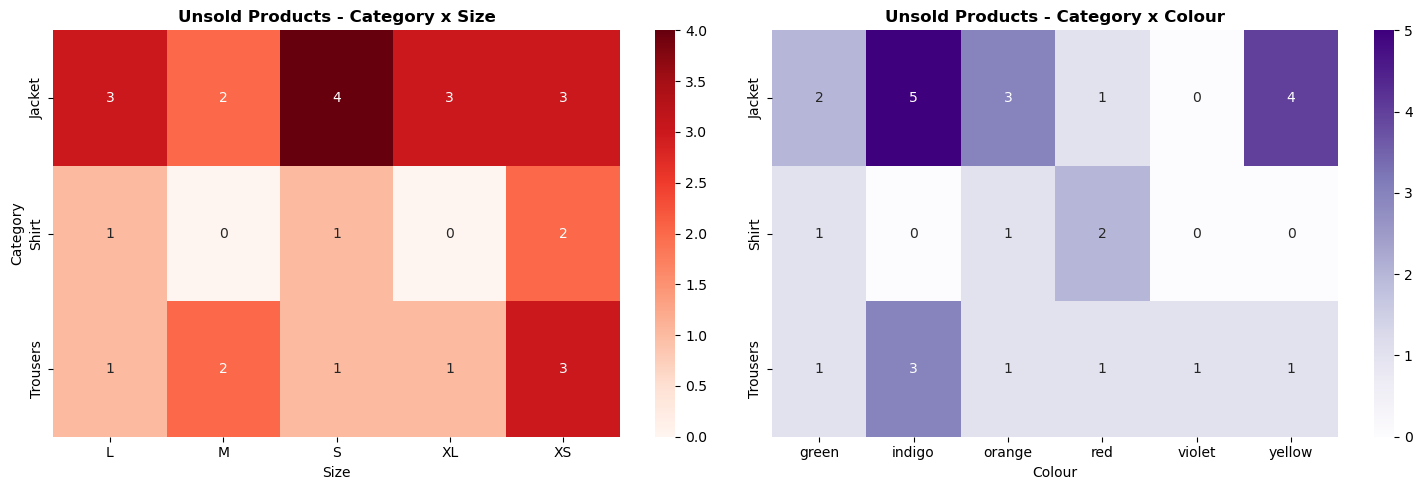

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# pivot tables
size_pivot = unsold_df.pivot_table(index='product_type', columns='size', values='product_ID', aggfunc='count', fill_value=0)
colour_pivot = unsold_df.pivot_table(index='product_type', columns='colour', values='product_ID', aggfunc='count', fill_value=0)

# figure layout
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.heatmap(size_pivot, annot=True, fmt='g', cmap='Reds', ax=axes[0])
axes[0].set_title("Unsold Products - Category x Size", fontsize=12, fontweight='bold')
axes[0].set_xlabel("Size")
axes[0].set_ylabel("Category")

sns.heatmap(colour_pivot, annot=True, fmt='g', cmap='Purples', ax=axes[1])
axes[1].set_title("Unsold Products - Category x Colour", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Colour")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


In [108]:
active_mean_price = df['price_per_unit'].mean()
unsold_mean_price = unsold_df['price'].mean()

active_mean_price, unsold_mean_price

(103.5016, 104.5925925925926)

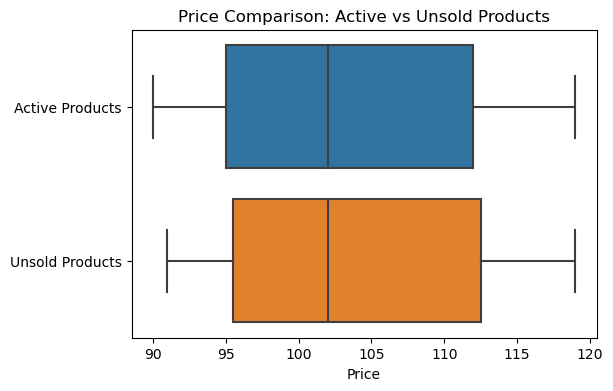

In [109]:
plt.figure(figsize=(6,4))
sns.boxplot(data=[df['price_per_unit'], unsold_df['price']], orient='h')
plt.yticks([0,1], ['Active Products', 'Unsold Products'])
plt.title("Price Comparison: Active vs Unsold Products")
plt.xlabel("Price")
plt.show()


# Product Segment Distribution (Including Unsold)

In [110]:
import plotly.express as px
import pandas as pd

# Toplam ürün sayısını product tablosundan al
total_products = products['product_ID'].nunique()

# Satılan ürünlerin segment dağılımı
segment_distribution = metric_df['segment'].value_counts()

# Unsold ürün sayısı
unsold_count = unsold_df['product_ID'].nunique()

# Yeni DataFrame oluştur (segmentler + unsold)
segment_data = []

# Mevcut segmentleri ekle
for segment, count in segment_distribution.items():
    segment_data.append({
        'Segment': segment,
        'Ürün Sayısı': count
    })

# Unsold ürünleri ekle
segment_data.append({
    'Segment': 'Unsold Products',
    'Ürün Sayısı': unsold_count
})

# DataFrame oluştur
segment_df = pd.DataFrame(segment_data)

# Yüzdeleri hesapla
segment_df['Yüzde'] = (segment_df['Ürün Sayısı'] / total_products * 100).round(2).astype(str) + "%"

# Detaylı tablo
print(segment_df)
print(f"\nToplam Ürün Sayısı: {total_products}")
print(f"Satılan Ürün Sayısı: {total_products - unsold_count}")
print(f"Satılmayan Ürün Sayısı: {unsold_count}")

                   Segment  Ürün Sayısı   Yüzde
0          High Performers          375  29.76%
1          Underperformers          311  24.68%
2  Premium / Niche Segment          275  21.83%
3          Volume Products          272  21.59%
4          Unsold Products           27   2.14%

Toplam Ürün Sayısı: 1260
Satılan Ürün Sayısı: 1233
Satılmayan Ürün Sayısı: 27


In [111]:
# Pie chart oluştur
fig = px.pie(segment_df,
             values='Ürün Sayısı',
             names='Segment',
             title=f'Ürün Segmentlerine Göre Dağılım (Toplam: {total_products} Ürün)',
             hover_data=['Yüzde'],
             labels={'Yüzde': 'Yüzde (%)'},
             color_discrete_sequence=px.colors.qualitative.Set3)

# Yüzdeleri göster
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  hovertemplate='<b>%{label}</b><br>Ürün Sayısı: %{value}<br>Yüzde: %{customdata[0]:.2f}%<extra></extra>')

fig.update_layout(
    width=900,
    height=700,
    showlegend=True
)

fig.show()
